In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import collections

In [2]:
xls = pd.ExcelFile("EastWestAirlines.xlsx")
# xls.sheet_names
df_raw = pd.read_excel(xls, sheet_name="data")
df = df_raw.copy()
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df = df.drop(["ID#"], axis = 1)
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [4]:
cols = df.columns
cols

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
minmax = MinMaxScaler()
df_arr = minmax.fit_transform(df)
df = pd.DataFrame(df_arr, columns = cols)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


###### Agglomerative Clustering

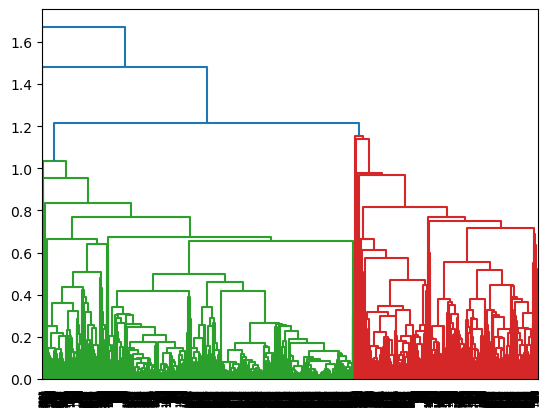

In [6]:
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))

In [7]:
hc = AgglomerativeClustering(n_clusters = 6, affinity='euclidean', linkage='average')

In [8]:
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/Users/hari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [9]:
Clusters.value_counts()

Clusters
0           2518
1           1462
4              8
2              6
3              4
5              1
dtype: int64

###### K-Means clustering

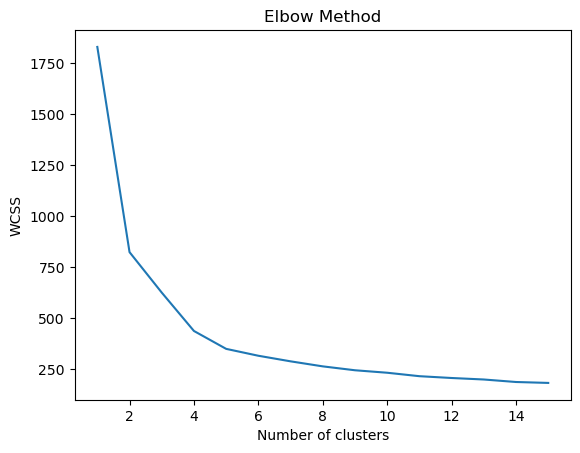

In [10]:
warnings.filterwarnings('ignore')
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i,random_state=145)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4,random_state=145)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=145)

In [12]:
metrics.silhouette_score(df, kmeans.labels_)

0.47483765255961

###### DBSCAN

In [13]:
array = df.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [14]:
dbscan = DBSCAN(eps=2.0, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=2.0, min_samples=4)

In [15]:
a = dbscan.labels_
a

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
len(a), collections.Counter(a)

(3999,
 Counter({0: 2453, 1: 1334, -1: 167, 5: 7, 2: 9, 6: 5, 3: 16, 4: 4, 7: 4}))

######  To find the best values for epsilon and minimum number of samples.

In [19]:
for i in np.arange(0.1,3.0,0.1):
    for j in range(1,10,1):
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(X)
        a = dbscan.labels_
        if len(collections.Counter(a)) < 10:
            print(i, j, len(collections.Counter(a)), collections.Counter(a))
            print("\n ")

0.1 7 8 Counter({-1: 3649, 3: 219, 1: 72, 5: 20, 0: 15, 2: 9, 4: 8, 6: 7})

 
0.1 8 7 Counter({-1: 3669, 3: 210, 1: 69, 5: 19, 0: 15, 2: 9, 4: 8})

 
0.1 9 7 Counter({-1: 3695, 3: 187, 1: 67, 5: 19, 0: 13, 2: 9, 4: 9})

 
0.2 7 9 Counter({-1: 3075, 0: 848, 1: 15, 3: 15, 7: 15, 6: 10, 2: 7, 4: 7, 5: 7})

 
0.2 8 7 Counter({-1: 3117, 0: 827, 1: 15, 5: 13, 3: 11, 2: 8, 4: 8})

 
0.2 9 6 Counter({-1: 3139, 0: 812, 1: 15, 4: 13, 3: 11, 2: 9})

 
0.8 5 9 Counter({0: 2227, 1: 956, -1: 776, 3: 12, 7: 7, 2: 6, 6: 6, 4: 5, 5: 4})

 
0.8 6 5 Counter({0: 2216, 1: 944, -1: 820, 2: 12, 3: 7})

 
0.8 7 5 Counter({0: 2209, 1: 934, -1: 839, 2: 10, 3: 7})

 
0.8 8 4 Counter({0: 2204, 1: 923, -1: 862, 2: 10})

 
0.8 9 3 Counter({0: 2194, 1: 915, -1: 890})

 
0.9 5 8 Counter({0: 2273, 1: 1033, -1: 657, 3: 13, 5: 8, 2: 5, 4: 5, 6: 5})

 
0.9 6 6 Counter({0: 2267, 1: 1012, -1: 692, 3: 13, 4: 8, 2: 7})

 
0.9 7 8 Counter({0: 2248, 1: 1004, -1: 713, 4: 11, 5: 7, 2: 6, 3: 5, 6: 5})

 
0.9 8 4 Counter({0: 2242,

2.5000000000000004 9 5 Counter({0: 3825, -1: 132, 2: 23, 3: 13, 1: 6})

 
2.6 3 5 Counter({0: 3880, -1: 79, 2: 23, 1: 14, 3: 3})

 
2.6 4 4 Counter({0: 3879, -1: 83, 2: 23, 1: 14})

 
2.6 5 4 Counter({0: 3873, -1: 90, 1: 23, 2: 13})

 
2.6 6 4 Counter({0: 3861, -1: 102, 1: 23, 2: 13})

 
2.6 7 4 Counter({0: 3856, -1: 107, 1: 23, 2: 13})

 
2.6 8 4 Counter({0: 3854, -1: 109, 1: 23, 2: 13})

 
2.6 9 4 Counter({0: 3848, -1: 115, 1: 23, 2: 13})

 
2.7 3 6 Counter({0: 3884, -1: 70, 2: 23, 1: 14, 3: 5, 4: 3})

 
2.7 4 4 Counter({0: 3882, -1: 80, 2: 23, 1: 14})

 
2.7 5 4 Counter({0: 3878, -1: 85, 2: 23, 1: 13})

 
2.7 6 4 Counter({0: 3868, -1: 95, 2: 23, 1: 13})

 
2.7 7 4 Counter({0: 3865, -1: 98, 1: 23, 2: 13})

 
2.7 8 4 Counter({0: 3863, -1: 100, 1: 23, 2: 13})

 
2.7 9 4 Counter({0: 3859, -1: 104, 1: 23, 2: 13})

 
2.8000000000000003 3 6 Counter({0: 3891, -1: 62, 2: 24, 1: 14, 3: 5, 4: 3})

 
2.8000000000000003 4 5 Counter({0: 3889, -1: 68, 2: 24, 1: 14, 3: 4})

 
2.8000000000000003 5 4

In [21]:
dbscan = DBSCAN(eps=2.0, min_samples=9)
dbscan.fit(X)

DBSCAN(eps=2.0, min_samples=9)

In [22]:
a = dbscan.labels_
a

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
clust= pd.DataFrame(dbscan.labels_, columns = ["Cluster"])
final_df = pd.concat([df, clust], axis = 1)
final_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
